In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df=pd.read_csv('HR_comma_sep.csv')

In [211]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [212]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [213]:
df.shape

(14999, 10)

In [214]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [215]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Data exploration and visualization
----------------------------------

In [216]:
left=df.loc[df['left']==1]
left.shape

(3571, 10)

In [217]:
retained=df.loc[df['left']==0]
retained.shape

(11428, 10)

Number of employee left the company:3571

Number of employee retained in the company:11428

Average numbers for all columns
--------------------------------


In [218]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


df.groupby('left').mean() — what does it do?

Your dataset has a column named "left" — usually in HR analytics this means:

1 → Employee left the company

0 → Employee stayed

When you write:

df.groupby('left').mean()

You are telling pandas:

"Group the rows into two groups: employees who stayed (0) and employees who left (1), and then calculate the average of all other numeric columns for each group."

example:

| left | satisfaction | salary |
| ---- | ------------ | ------ |
| 0    | 0.8          | 50000  |
| 1    | 0.4          | 35000  |
| 0    | 0.9          | 52000  |
| 1    | 0.3          | 36000  |

after: df.groupby('left').mean()

You get:

| left | satisfaction         | salary |
| ---- | -------------------- | ------ |
| 0    | (0.8 + 0.9)/2 = 0.85 | 51000  |
| 1    | (0.4 + 0.3)/2 = 0.35 | 35500  |


Interpretation:

Employees who stayed had higher satisfaction & salary on average.

Employees who left had lower satisfaction & salary on average.

From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Impact of salary on employee retention
--------------------------------------

<Axes: xlabel='salary'>

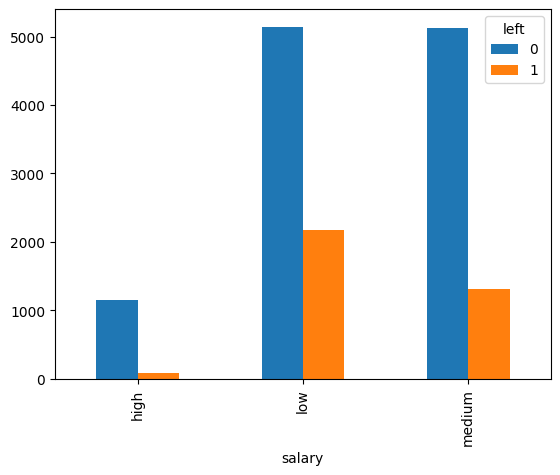

In [219]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

Impact of department on employee retention
-------------------------------------


<Axes: xlabel='Department'>

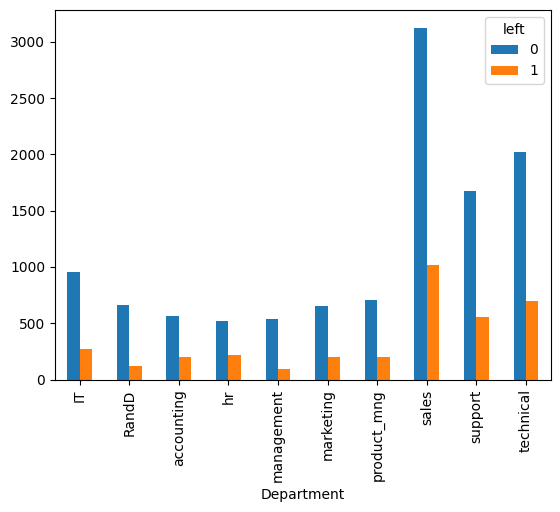

In [220]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis



From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [221]:
sub_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [222]:
salary_dummies=pd.get_dummies(sub_df['salary'],prefix='salary',drop_first=True,dtype=int)
salary_dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


from the above it is identified that:

salary_high: 0 0 0 ==>  0 0

salary_low:  0 1 0 ==>  1 0

salary_medium: 0 0 1==> 0 1

In [223]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [224]:
df_with_dummies=pd.concat([sub_df,salary_dummies],axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_low,salary_medium
0,0.38,157,0,low,1,0
1,0.80,262,0,medium,0,1
2,0.11,272,0,medium,0,1
3,0.72,223,0,low,1,0
4,0.37,159,0,low,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [225]:
df_with_dummies.drop(['salary'],axis=1,inplace=True)
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


Splitting Data:
--------------

In [226]:
x=df_with_dummies.iloc[:,:]
y=df['left']

In [227]:
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [228]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [230]:
len(x_train)

10499

In [231]:
len(x_test)

4500

In [232]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [233]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
11275    0
3828     0
4645     0
6069     0
2506     0
Name: left, Length: 4500, dtype: int64

Accuracy of the model
---------------------

In [234]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

In [235]:
cm

array([[3237,  225],
       [ 770,  268]], dtype=int64)

In [236]:
score*100

77.88888888888889